In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/day24standardization/Social_Network_Ads.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/kaggle/input/day24standardization/Social_Network_Ads.csv")

In [4]:
df.shape

(400, 5)

In [5]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
262,15672821,Female,55,125000,1
126,15610801,Male,42,65000,0
179,15673367,Female,31,34000,0
381,15670615,Male,48,33000,1
16,15733883,Male,47,25000,1


In [6]:
df1=df.drop(["User ID",	"Gender"],axis=1)

In [7]:
df1.sample(5)

,Age,EstimatedSalary,Purchased
16,47,25000,1
155,31,15000,0
230,35,147000,1
200,35,39000,0
391,47,23000,1


# Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df1.drop(["Purchased"],axis=1),df["Purchased"],test_size=0.3,random_state=0)

In [9]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

# StandardScaler

In [10]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [11]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [12]:
np.round(X_train_scaled.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0


In [13]:
np.round(X_train.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,38.0,69807.0
std,10.0,34641.0
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


# Effect of Scaling

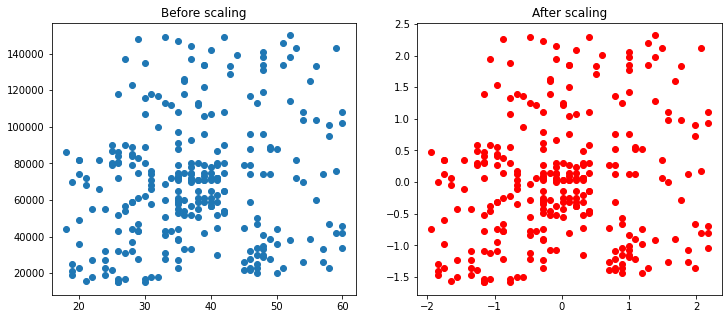

In [14]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train["Age"],X_train["EstimatedSalary"])
ax1.set_title("Before scaling")

ax2.scatter(X_train_scaled["Age"],X_train_scaled["EstimatedSalary"],color="red")
ax2.set_title("After scaling")
plt.show()

In [15]:
import seaborn as sns

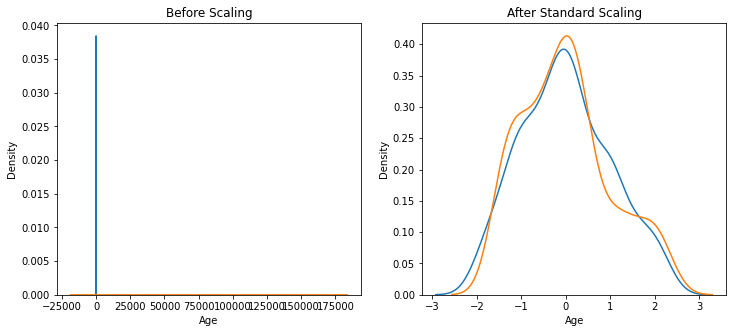

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Comparison of Distributions

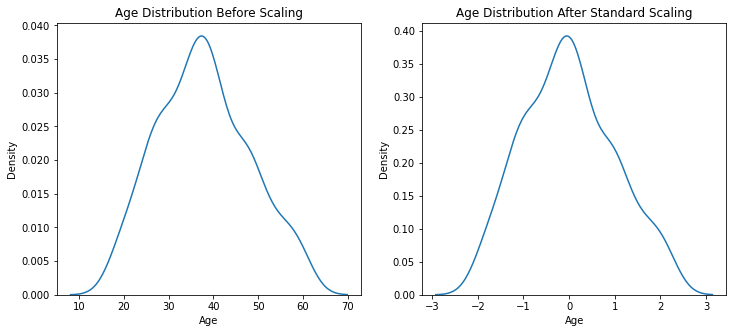

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

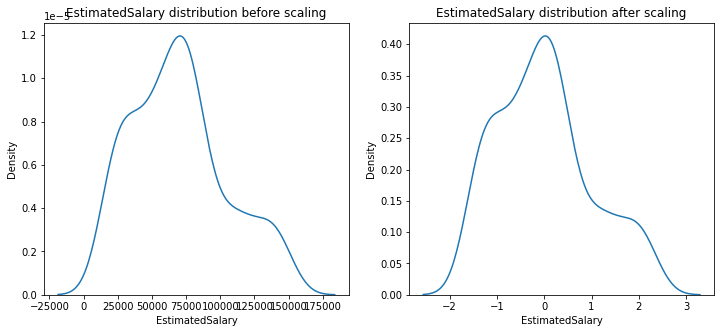

In [18]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("EstimatedSalary distribution before scaling")
sns.kdeplot(X_train["EstimatedSalary"],ax=ax1)

ax2.set_title("EstimatedSalary distribution after scaling")
sns.kdeplot(X_train_scaled["EstimatedSalary"],ax=ax2)

plt.show()

# Why scaling is important?

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [21]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [22]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
print("Actual",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
scaled 0.8666666666666667


In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()

In [27]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [28]:
y_pred=dt.predict(X_test)
y_pred_scaled=dt_scaled.predict(X_test_scaled)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8666666666666667
Scaled 0.8666666666666667


# Effect of Outlier

In [31]:
df1 = df1.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

In [32]:
df1

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


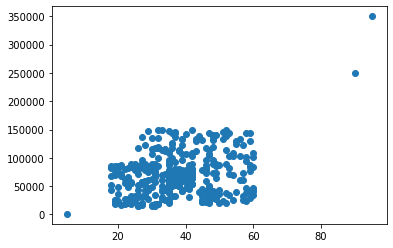

In [33]:
plt.scatter(df1['Age'], df1['EstimatedSalary'])

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop('Purchased', axis=1),
                                                    df1['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

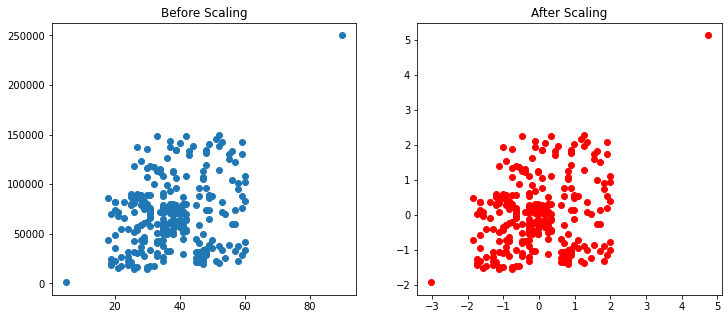

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()